In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# Loading the Dataset 

In [2]:
df_Fall_2023 = pd.read_excel('Data set.xlsx', sheet_name = 'Fall 2023')
print(df_Fall_2023)

         Term   ID Subject Code  Course Number
0   Fall 2023  182          ACC            100
1   Fall 2023  172          ACC            100
2   Fall 2023   80          BIO            202
3   Fall 2023   76          BIO            202
4   Fall 2023   78          BIO            202
..        ...  ...          ...            ...
92  Fall 2023  149          WRT            200
93  Fall 2023   53          WRT            101
94  Fall 2023    3          WRT            202
95  Fall 2023  182          WRT            100
96  Fall 2023  111          KOR            122

[97 rows x 4 columns]


In [4]:
df_Fall_2023.head(10)

,Term,ID,Subject Code,Course Number
0,Fall 2023,182,ACC,100
1,Fall 2023,172,ACC,100
2,Fall 2023,80,BIO,202
3,Fall 2023,76,BIO,202
4,Fall 2023,78,BIO,202
5,Fall 2023,81,BIO,202
6,Fall 2023,83,BIO,202
7,Fall 2023,84,BIO,202
8,Fall 2023,165,BIO,100
9,Fall 2023,166,BIO,100


ACC: Accounting

BIO: Biology

KOR: Korean

MAT: Mathematics

PSY: Psychology

PHY: Physics

REA: Reading or Real Estate

WEL: Wellness or Welding

WRT: Writing

# Preprocessing Steps 

In [5]:
# check null values
df_Fall_2023.isna().sum()

Term             0
ID               0
Subject Code     0
Course Number    0
dtype: int64

In [6]:
df_Fall_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Term           97 non-null     object
 1   ID             97 non-null     int64 
 2   Subject Code   97 non-null     object
 3   Course Number  97 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [7]:
# Check for duplicates
print(df_Fall_2023.duplicated().sum())


3


In [8]:
duplicate_rows = df_Fall_2023[df_Fall_2023.duplicated()]
print(duplicate_rows)

         Term   ID Subject Code  Course Number
29  Fall 2023  155          MAT            101
70  Fall 2023  180          REA            105
96  Fall 2023  111          KOR            122


In [9]:
# Drop the duplicates
df_Fall_2023 = df_Fall_2023.drop_duplicates()

In [10]:
duplicate_rows = df_Fall_2023[df_Fall_2023.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Term, ID, Subject Code, Course Number]
Index: []


In [25]:
df_Fall_2023.to_excel("Fall_2023_Analysis.xlsx")

In [12]:
df_Fall_2023['Subject Code'].value_counts()

MAT     29
WRT     21
PSY     11
PHY     11
BIO      9
REA      4
WEL      4
ACC      2
KOR      2
KOR      1
Name: Subject Code, dtype: int64

In [13]:
df_Fall_2023['Course Number'].value_counts()

101    41
202    21
100    13
102     8
200     6
105     3
122     1
300     1
Name: Course Number, dtype: int64

In [14]:
df_Fall_2023['Subject Code'] = df_Fall_2023['Subject Code'].str.strip()

In [15]:
df_Fall_2023['Subject Code'].value_counts()

MAT    29
WRT    21
PSY    11
PHY    11
BIO     9
REA     4
WEL     4
KOR     3
ACC     2
Name: Subject Code, dtype: int64

In [30]:
df_Fall_2023['Subject Code'].unique()

array(['ACC', 'BIO', 'KOR', 'MAT', 'PSY', 'PHY', 'REA', 'WEL', 'WRT'],
      dtype=object)

In [16]:
# Group by Course Number and check unique Subject Codes
cross_listed_courses = df_Fall_2023.groupby("Course Number")["Subject Code"].nunique()
print(cross_listed_courses)

Course Number
100    5
101    4
102    1
105    3
122    1
200    5
202    3
300    1
Name: Subject Code, dtype: int64


In [17]:
# Filter for cross-listed courses (where count of Subject Codes > 1)
cross_listed = cross_listed_courses[cross_listed_courses > 1]
print("Cross-listed courses (multiple subject codes per course number):")
print(cross_listed)


Cross-listed courses (multiple subject codes per course number):
Course Number
100    5
101    4
105    3
200    5
202    3
Name: Subject Code, dtype: int64


In [18]:
# Detailed view of cross-listed courses
detailed_cross_listed = df_Fall_2023[df_Fall_2023["Course Number"].isin(cross_listed.index)]
print("\nDetailed view of cross-listed courses:")
print(detailed_cross_listed)



Detailed view of cross-listed courses:
         Term   ID Subject Code  Course Number
0   Fall 2023  182          ACC            100
1   Fall 2023  172          ACC            100
2   Fall 2023   80          BIO            202
3   Fall 2023   76          BIO            202
4   Fall 2023   78          BIO            202
..        ...  ...          ...            ...
91  Fall 2023  147          WRT            105
92  Fall 2023  149          WRT            200
93  Fall 2023   53          WRT            101
94  Fall 2023    3          WRT            202
95  Fall 2023  182          WRT            100

[84 rows x 4 columns]


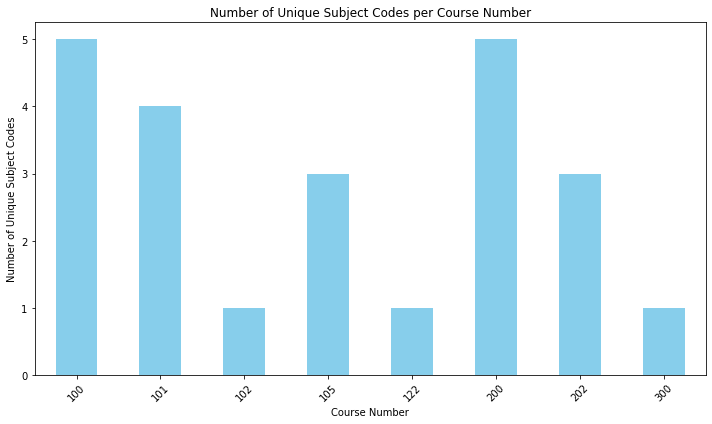

In [19]:
# Visualization
import matplotlib.pyplot as plt

# Count unique Subject Codes per Course Number
unique_subjects_per_course = df_Fall_2023.groupby("Course Number")["Subject Code"].nunique()

# Plot a bar chart
unique_subjects_per_course.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Number of Unique Subject Codes per Course Number")
plt.xlabel("Course Number")
plt.ylabel("Number of Unique Subject Codes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Group by 'Subject Code' and list all 'Course Number'
grouped = df_Fall_2023.groupby('Subject Code')['Course Number'].apply(list).reset_index()

print(grouped)


  Subject Code                                      Course Number
0          ACC                                         [100, 100]
1          BIO      [202, 202, 202, 202, 202, 202, 100, 100, 100]
2          KOR                                    [200, 122, 200]
3          MAT  [300, 101, 101, 101, 101, 101, 101, 101, 101, ...
4          PHY  [101, 101, 101, 101, 101, 101, 101, 101, 101, ...
5          PSY  [101, 102, 102, 102, 200, 102, 102, 102, 102, ...
6          REA                               [105, 100, 100, 100]
7          WEL                               [100, 100, 100, 100]
8          WRT  [202, 101, 101, 101, 101, 202, 101, 101, 202, ...


In [21]:
# Group by 'Subject Code' and get unique course numbers
grouped = df_Fall_2023.groupby('Subject Code')['Course Number'].apply(lambda x: list(set(x))).reset_index()

print(grouped)


  Subject Code              Course Number
0          ACC                      [100]
1          BIO                 [202, 100]
2          KOR                 [200, 122]
3          MAT       [200, 202, 300, 101]
4          PHY                 [200, 101]
5          PSY       [200, 105, 101, 102]
6          REA                 [105, 100]
7          WEL                      [100]
8          WRT  [100, 101, 200, 105, 202]


In [22]:
# Find the most frequent course number for each subject
most_frequent = df_Fall_2023.groupby(['Subject Code'])['Course Number'].agg(lambda x: x.value_counts().idxmax()).reset_index()

print(most_frequent)


  Subject Code  Course Number
0          ACC            100
1          BIO            202
2          KOR            200
3          MAT            101
4          PHY            101
5          PSY            102
6          REA            100
7          WEL            100
8          WRT            101
